In [0]:
import torch # PyTorch 
from torchvision import datasets # Datasets module 
import torchvision.transforms as transforms # Image Transforms 
from torch.utils.data.sampler import SubsetRandomSampler # Sampler 

In [0]:
import numpy as np
import pandas as pd

In [3]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root = 'data', train = True, download = True, \
                            transform = transform)
test_data = datasets.MNIST(root = 'data', train = False, download = True,\
                           transform = transform)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


In [4]:
num_train = len(train_data)
print('num_train', num_train)
indices = list(range(num_train))
print(len(indices))

num_train 60000
60000


In [0]:
np.random.shuffle(indices)

In [6]:
valid_size = 0.2
split = int(np.floor(valid_size*num_train))
train_idx, valid_idx = indices[split:], indices[:split]
print(len(train_idx))
print(len(valid_idx))

48000
12000


In [0]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
# prepare dataloaders
# number of subprocesses to use for data loading
num_workers = 0 # do not modify 
# how many samples per batch to load
batch_size = 20 # ie 20 images per batch 

# Training Set 
train_loader = torch.utils.data.DataLoader(dataset=train_data, \
                                           batch_size=batch_size, \
                                           sampler=train_sampler, \
                                           num_workers=num_workers)
# Validation Set 
valid_loader = torch.utils.data.DataLoader(dataset=train_data,\
                                           batch_size=batch_size, \
                                           sampler = valid_sampler, \
                                           num_workers = num_workers)

# Test Set 
test_loader = torch.utils.data.DataLoader(dataset=test_data,\
                                           batch_size=batch_size, \
                                           num_workers = num_workers)

In [8]:
# Visualize a whole batch of data from the dataloaders 

dataider = iter(train_loader)
images, labels = dataider.next()

print(len(images), len(labels)) # Should be equal to the batch size, 20
print('Correct Labels: ', labels)
images = images.numpy() # Convert the images to numpy array for matplotlib
print('Shape of our images batch =', images.shape)
print('Batch Size =', images.shape[0], 'Image Height/Width =', \
                                                        images.shape[2])

print()
print('Squeezing the images tensor =', np.squeeze(images).shape)
print('Un-squeezing the images tensor (axis=3) =', \
                                        np.expand_dims(images, axis=3).shape)

20 20
Correct Labels:  tensor([3, 0, 7, 8, 1, 3, 2, 0, 1, 4, 7, 0, 9, 6, 2, 8, 8, 3, 1, 5])
Shape of our images batch = (20, 1, 28, 28)
Batch Size = 20 Image Height/Width = 28

Squeezing the images tensor = (20, 28, 28)
Un-squeezing the images tensor (axis=3) = (20, 1, 28, 1, 28)


In [0]:
import matplotlib.pyplot as plt 
# Plots are plotted inside the notebooks, 'inline'
%matplotlib inline 

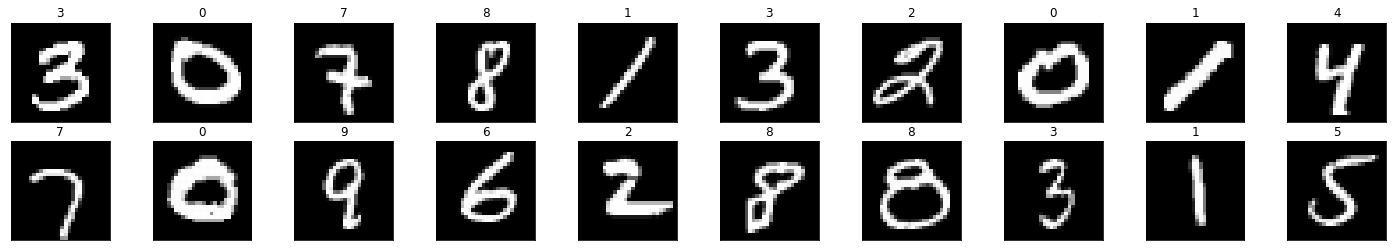

In [10]:
# Plot the whole batch 
fig = plt.figure(figsize=(25, 4))
# Loop over all the images in the batch(20)
for idx in np.arange(20):
    # Add a subplot for the image 
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    # Populate the subplot with the image 
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [11]:
# Just for fun! 

dataiter = iter(train_loader)  
images, labels = dataiter.next() 
images = images.numpy() 
np.set_printoptions(precision=2, threshold=None, edgeitems=None, \
                    linewidth=180, suppress=None)
print('Label', labels[0])
print(images[0])

Label tensor(0)
[[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.14 0.34 0.57 0.17 0.03 0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.17 0.33 0.33 0.88 0.55 0.98 0.98 0.16 0.   0.   0.  ]
  [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5  0.5  0.74 0.98 0.98 0.99 0.98 0.98 0.

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class MNISTModel1(nn.Module):
    # Here we define the neural architecture 
    def __init__(self):
        super(MNISTModel1, self).__init__() # Initialize the nn module 

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3,\
                               stride = 1, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3,\
                               stride = 1, padding = 1)

        self.linear1 = nn.Linear(in_features = 12544, out_features = 256)
        self.linear2 = nn.Linear(in_features = 256, out_features = 64)
        self.linear3 = nn.Linear(in_features = 64, out_features = 10)
        self.dropout = nn.Dropout(p = 0.25)

    # Here we define the 'forward behaviour' of our neural architecture 
    def forward(self, image_batch):
        image_batch = F.relu(input = self.conv1(image_batch))
        image_batch = F.relu(input = self.conv2(image_batch))

        flat_image_batch = image_batch.view(image_batch.shape[0], -1)
        flat_image_batch = F.relu(input = self.linear1(flat_image_batch))

        flat_image_batch = self.dropout(F.relu(input = self.linear2(flat_image_batch)))

        # Final Layer of the network 
        flat_image_batch = F.relu(input = self.linear3(flat_image_batch))

        # The output from the final layer is a tensor with 10 'logits'
        return flat_image_batch

In [14]:
!pip install torchsummary

In [0]:
from torchsummary import summary

In [16]:
# On GPU or on CPU 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('The model will run on', device)

# Initialize the model 
mnist1 = MNISTModel1().to(device)
summary(model=mnist1, input_size=(1, 28, 28), batch_size=20)

The model will run on cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [20, 8, 28, 28]              80
            Conv2d-2           [20, 16, 28, 28]           1,168
            Linear-3                  [20, 256]       3,211,520
            Linear-4                   [20, 64]          16,448
           Dropout-5                   [20, 64]               0
            Linear-6                   [20, 10]             650
Total params: 3,229,866
Trainable params: 3,229,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.06
Forward/backward pass size (MB): 2.93
Params size (MB): 12.32
Estimated Total Size (MB): 15.31
----------------------------------------------------------------


In [17]:
!pip install poutyne

     |████████████████████████████████| 81kB 7.3MB/s 


In [0]:
from poutyne.framework import Model

In [0]:
from torch import optim

In [0]:
# A few hyperparamters for the training loop 
learning_rate = 0.1
epochs = 3

def poutyne_train(pytorch_model):
    
    optimizer = optim.SGD(pytorch_model.parameters(), lr = learning_rate)
    loss_function = nn.CrossEntropyLoss()

    model = Model(pytorch_model, optimizer, loss_function, batch_metrics = ['accuracy'])

    model.to(device)
    model.fit_generator(train_loader, valid_loader, epochs = epochs)
    
    test_loss ,test_acc = model.evaluate_generator(test_loader)

    print(f'Test:\n\tLoss: {test_loss: .3f}\n\tAccuracy: {test_acc: .3f}')

    return None

In [21]:
poutyne_train(mnist1)

Epoch 1/3 17.45s Step 2400/2400: loss: 0.351793, acc: 89.012500, val_loss: 0.093538, val_acc: 97.091667
Epoch 2/3 17.37s Step 2400/2400: loss: 0.092093, acc: 97.412500, val_loss: 0.070505, val_acc: 97.891667
Epoch 3/3 17.47s Step 2400/2400: loss: 0.054607, acc: 98.360417, val_loss: 0.063074, val_acc: 98.158333
Test:
	Loss:  0.052
	Accuracy:  98.420


In [0]:
from poutyne.framework import ModelCheckpoint
from poutyne.framework import EarlyStopping

In [0]:
# Turn the GPU ON

# A few hyperparamters for the training loop 
learning_rate = 0.1
epochs = 10 # let's train for more epochs to see the callbacks in action

def better_poutyne_train(model_name, pytorch_model):
    
    callbacks = [
        ModelCheckpoint(model_name + '_last_epoch.cpkt', \
                        temporary_filename='last_epoch.ckpt.tmp'),
        EarlyStopping(monitor='val_acc', patience=0, verbose=True, mode='max')
    ]
    
    # Select the optimizer and the loss function 
    optimizer = optim.SGD(pytorch_model.parameters(), lr=learning_rate)
    loss_function = nn.CrossEntropyLoss()
    # Poutyne Model
    model = Model(pytorch_model, optimizer, loss_function, batch_metrics=['accuracy'])
    # Send the 'Poutyne model' on GPU/CPU whichever is available 
    model.to(device)
    # Train
    model.fit_generator(train_loader, valid_loader, epochs=epochs, callbacks=callbacks)
    # Test
    test_loss, test_acc = model.evaluate_generator(test_loader)
    print(f'Test:\n\tLoss: {test_loss: .3f}\n\tAccuracy: {test_acc: .3f}')

    return None

In [24]:
#For Fun
!nvidia-smi

Thu Apr 23 08:22:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    29W /  70W |    851MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [25]:
mnist2 = MNISTModel1().to(device)
summary(model=mnist2, input_size=(1, 28, 28), batch_size=20)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [20, 8, 28, 28]              80
            Conv2d-2           [20, 16, 28, 28]           1,168
            Linear-3                  [20, 256]       3,211,520
            Linear-4                   [20, 64]          16,448
           Dropout-5                   [20, 64]               0
            Linear-6                   [20, 10]             650
Total params: 3,229,866
Trainable params: 3,229,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.06
Forward/backward pass size (MB): 2.93
Params size (MB): 12.32
Estimated Total Size (MB): 15.31
----------------------------------------------------------------


In [26]:
better_poutyne_train(model_name='mnist2', pytorch_model=mnist2)

Epoch 1/10 17.15s Step 2400/2400: loss: 0.346445, acc: 89.412500, val_loss: 0.099176, val_acc: 97.066667
Epoch 2/10 17.63s Step 2400/2400: loss: 0.098996, acc: 97.170833, val_loss: 0.082204, val_acc: 97.558333
Epoch 3/10 17.73s Step 2400/2400: loss: 0.058652, acc: 98.300000, val_loss: 0.067269, val_acc: 98.141667
Epoch 4/10 17.20s Step 2400/2400: loss: 0.039462, acc: 98.833333, val_loss: 0.064969, val_acc: 98.133333
Epoch 5/10 17.26s Step 2400/2400: loss: 0.027153, acc: 99.139583, val_loss: 0.060614, val_acc: 98.400000
Epoch 00005: early stopping
Test:
	Loss:  0.053
	Accuracy:  98.480


In [27]:
!pip install livelossplot 

In [0]:
from livelossplot import PlotLossesPoutyne

In [0]:
# A fancy pouytne training loop

# A few hyperparamters for the training loop 
learning_rate = 0.1
epochs = 10 # let's train for more epochs to see the callbacks in action

def fancy_poutyne_train(model_name, pytorch_model):
    
    # setting up the livelossplot callback
    plotlosses = PlotLossesPoutyne()
    callbacks = [
        # Save the latest weights 
        ModelCheckpoint(model_name + '_last_epoch.ckpt', \
                        temporary_filename='last_epoch.ckpt.tmp'),
        # EarlyStopping
        EarlyStopping(monitor='val_acc', patience=0, verbose=True, mode='max'),
        # ---- FILL IN ----
        plotlosses
    ]
    
    # Select the optimizer and the loss function 
    optimizer = optim.SGD(pytorch_model.parameters(), lr=learning_rate)
    loss_function = nn.CrossEntropyLoss()
    # Poutyne Model
    model = Model(pytorch_model, optimizer, loss_function, batch_metrics=['accuracy'])
    # Send the 'Poutyne model' on GPU/CPU whichever is available 
    model.to(device)
    # Train
    model.fit_generator(train_loader, valid_loader, epochs=epochs, callbacks=callbacks)
    # Test
    test_loss, test_acc = model.evaluate_generator(test_loader)
    print(f'Test:\n\tLoss: {test_loss: .3f}\n\tAccuracy: {test_acc: .3f}')

    return None 

In [30]:
mnist3 = MNISTModel1().to(device)
summary(model=mnist3, input_size=(1, 28, 28), batch_size=20)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [20, 8, 28, 28]              80
            Conv2d-2           [20, 16, 28, 28]           1,168
            Linear-3                  [20, 256]       3,211,520
            Linear-4                   [20, 64]          16,448
           Dropout-5                   [20, 64]               0
            Linear-6                   [20, 10]             650
Total params: 3,229,866
Trainable params: 3,229,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.06
Forward/backward pass size (MB): 2.93
Params size (MB): 12.32
Estimated Total Size (MB): 15.31
----------------------------------------------------------------


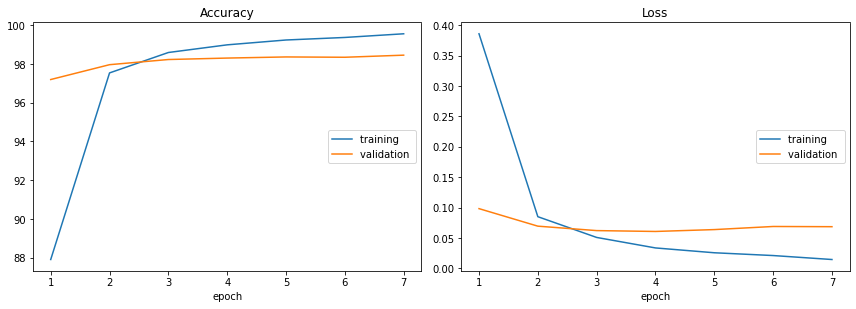

Accuracy
	training         	 (min:   87.904, max:   99.562, cur:   99.562)
	validation       	 (min:   97.200, max:   98.458, cur:   98.458)
Loss
	training         	 (min:    0.014, max:    0.386, cur:    0.014)
	validation       	 (min:    0.061, max:    0.098, cur:    0.068)
Epoch 00007: early stopping
Test:
	Loss:  0.063
	Accuracy:  98.540


In [31]:
#Nerd Stuff
fancy_poutyne_train(model_name='mnist3', pytorch_model=mnist3)

In [0]:
def inference():
    PATH = 'mnist3_last_epoch.ckpt' # Path to the saved model checkpoint

    model = MNISTModel1().to('cpu')
    model.load_state_dict(torch.load(PATH))

    summary(model, (1, 28, 28), device = 'cpu')

    dataiter = iter(train_loader)
    images, labels = dataiter.next()
    label = labels[0]

    image = images[0]

    image = torch.unsqueeze(image, dim=0)
    print('\nimage.shape =>', image.shape)

    with torch.no_grad():
      output = model.forward(image)

    class_probabilities = F.softmax(output, dim=1).numpy().squeeze()
    print('\nClass Probabilities ==>', class_probabilities)
    for i, proba in enumerate(class_probabilities):
        print(f'Class \t{i}\t Probability \t{100*proba:.2f}%')

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image.resize_(1, 28, 28).numpy().squeeze())
    ax1.set_title('Ground Truth ' + str(label.numpy()))
    # ax2 holds a horizontal bar chart containing class_probabilities 
    ax2.barh(np.arange(10), class_probabilities)
    ax2.set_aspect(0.1) # aspect ratio of ax2, else it will get too big
    ax2.set_yticks(np.arange(10)) # 10 ticks on the y-axis for 10 classes
    ax2.set_yticklabels(np.arange(10)) # set the ticklabels from 0 to 9
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1) # probability can't be over 1, hence set limit to 1.1

    return None

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
            Conv2d-2           [-1, 16, 28, 28]           1,168
            Linear-3                  [-1, 256]       3,211,520
            Linear-4                   [-1, 64]          16,448
           Dropout-5                   [-1, 64]               0
            Linear-6                   [-1, 10]             650
Total params: 3,229,866
Trainable params: 3,229,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.15
Params size (MB): 12.32
Estimated Total Size (MB): 12.47
----------------------------------------------------------------

image.shape => torch.Size([1, 1, 28, 28])

Class Probabilities ==> [5.41e-09 5.41e-09 5.41e-09 1.08e-08 5.66e-05 1.12e-06 5.41e-09 2.18e-08 3.02e-07 1.00e+00]
Clas

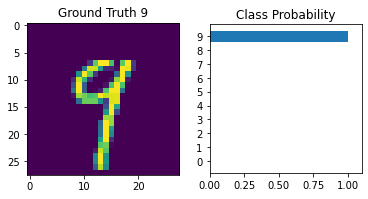

In [33]:
inference()